In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score
from sklearn.inspection import permutation_importance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf

## Boilerplate code 
wapo csv as a template

In [2]:
random_state = 109

# load data
data = pd.read_csv('data/fatal-police-shootings-data.csv')
response, multi_class = 'race', True

# drop unnecessary columns
cols_to_drop = ['id', 'name', 'date', 'city', 'state', 'longitude', 'latitude', 'is_geocoding_exact']
data = data.drop(cols_to_drop, axis=1)
total = len(data)

# drop nas
data = data.dropna()
print(f'Number of victims missing values: {total-len(data)}')

# convert booleans to integers
bools_to_ints = ['signs_of_mental_illness', 'body_camera']
data[bools_to_ints] = data[bools_to_ints].astype(int)

# convert response variable to 0 and n_classes-1
if multi_class:
    le = LabelEncoder()
    data[response] = le.fit_transform(data[response])
    print(f'Response variable classes: {le.classes_}')

# convert other variables to dummies
data = pd.get_dummies(data)
data.head()

Number of victims missing values: 1121
Response variable classes: ['A' 'B' 'H' 'N' 'O' 'W']


,age,race,signs_of_mental_illness,body_camera,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,...,armed_wrench,gender_F,gender_M,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
0,53.0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,47.0,5,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,23.0,2,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,32.0,5,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,39.0,2,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [3]:
# splits
rows = len(data)
train_size = 0.6
val_size = 0.2

train, validate, test = np.split(data.sample(frac=1, random_state=random_state), [int(train_size*rows), int((train_size+val_size)*rows)])

x_train, y_train = train.drop(response, axis=1), train[response]
x_val, y_val = validate.drop(response, axis=1), validate[response]
x_test, y_test = test.drop(response, axis=1), test[response]

print(f'Train size: {len(train)/rows:.2f}')
print(f'Val size: {len(validate)/rows:.2f}')
print(f'Test size: {len(test)/rows:.2f}')

Train size: 0.60
Val size: 0.20
Test size: 0.20


In [4]:
random_forest = RandomForestClassifier(random_state=random_state).fit(x_train, y_train)
random_forest.score(x_val, y_val)

0.4731182795698925

In [5]:
forest_result = permutation_importance(random_forest, x_train, y_train, random_state=random_state)

Text(0.5, 0, 'Permutation Feature Importance')

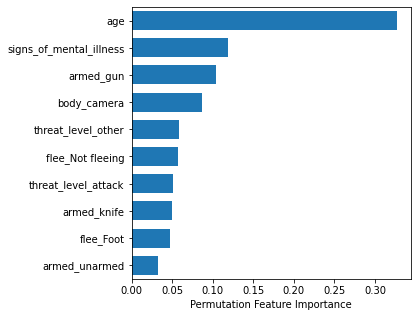

In [6]:
plt.figure(figsize=(5,5))

tree_importance_sorted_idx = np.argsort(forest_result.importances_mean)[-10:]
tree_indices = np.arange(0, len(forest_result.importances_mean[-10:])) + 0.5

plt.barh(tree_indices, forest_result.importances_mean[tree_importance_sorted_idx], height=0.7)
plt.yticks(tree_indices, x_train.columns[tree_importance_sorted_idx])
plt.ylim((0, len(forest_result.importances_mean[-10:])))
plt.xlabel("Permutation Feature Importance")